In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset=pd.read_csv('HousingData.csv')

In [3]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


<AxesSubplot:xlabel='CHAS', ylabel='MEDV'>

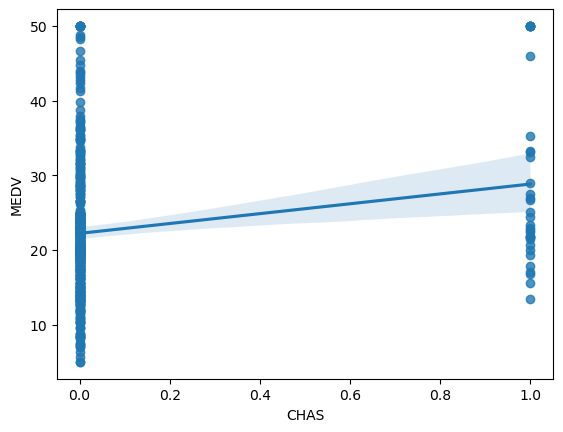

In [4]:
sns.regplot(x='CHAS',y='MEDV',data=dataset)

In [5]:
dataset=dataset.reset_index()

In [6]:
dataset['CRIM']=dataset['CRIM'].fillna(value='0.03237')

In [7]:
dataset.isnull().sum()

index       0
CRIM        0
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [8]:
dataset['ZN']=dataset['ZN'].fillna(value='0.0')
dataset['LSTAT']=dataset['LSTAT'].fillna(value='4.98')
dataset['AGE']=dataset['AGE'].fillna(value='45')
dataset['CHAS']=dataset['CHAS'].fillna(value='0.0')
dataset['INDUS']=dataset['INDUS'].fillna(value='7.07')

In [9]:
 from sklearn.model_selection import train_test_split

In [10]:
X=dataset.iloc[:,:-1]
y=dataset['MEDV']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.30, random_state=101)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler=StandardScaler()

In [14]:
X_train=scaler.fit_transform(X_train)

In [15]:
X_test=scaler.transform(X_test)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lr=LinearRegression()

In [18]:
lr.fit(X_train,y_train)

LinearRegression()

In [19]:
print(lr.coef_)

[-0.04107828 -0.82319262  1.04566275 -0.22307053  1.10661565 -1.82451795
  2.52496185 -0.37165535 -3.09048076  1.94419531 -1.52038623 -2.06688502
  0.56057505 -3.24550783]


In [20]:
print(lr.intercept_)

21.97683615819209


In [21]:
lr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [22]:
predict=lr.predict(X_test)

In [23]:
predict

array([40.69143433, 27.42678593, 15.69534272, 16.88968347, 31.46938183,
       32.60895537, 38.38512717,  9.71478747, 31.89894672,  7.47488156,
       30.69765908, 14.20997002, 16.64454794, 17.53171638, 24.71714993,
       22.02641381,  7.40703756, 33.09309783, 28.37460408, 24.11016726,
       12.38338971, 21.17826119, 21.94711452, 24.6105319 , 34.05895005,
       17.90849306, 32.70356058, 18.20905466, 26.40354901, 35.02666032,
       19.70216519, 18.04031418, 37.21583559, 46.42580244, 30.0361074 ,
       22.56973205, 15.90707128, 17.38004374,  5.97590091, 29.75179902,
       23.84528062, 12.53928424, 34.79022272, 13.28825021, 17.61602858,
       24.51201079, 30.33121578, 15.93124996, 26.25922876, 22.73216189,
       31.49337617, 37.61119051, 22.08780825, 15.03576943, 29.66379217,
        0.96439586, 20.50343312, 17.05056508, 24.30612337, 21.09931923,
       31.43222676,  4.45964332, 12.97942471, 20.5853195 , 10.47253734,
       24.0075821 , 23.97745332, 20.45785396, 17.50922013, 18.75

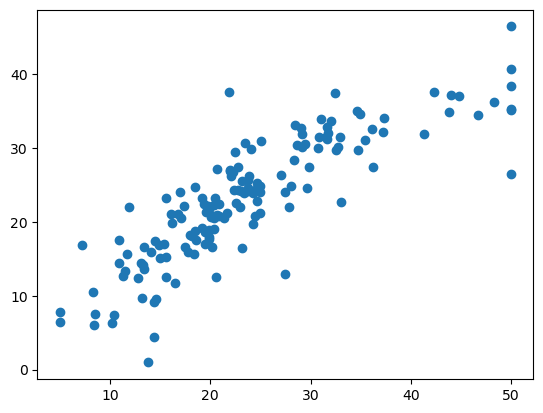

In [24]:
plt.scatter(y_test,predict)

In [25]:
residuals=y_test-predict

In [26]:
residuals

195    9.308566
4      8.773214
434   -3.995343
458   -1.989683
39    -0.669382
         ...   
213    3.228026
269   -6.433347
278   -0.967439
17     0.941864
391    6.725626
Name: MEDV, Length: 152, dtype: float64

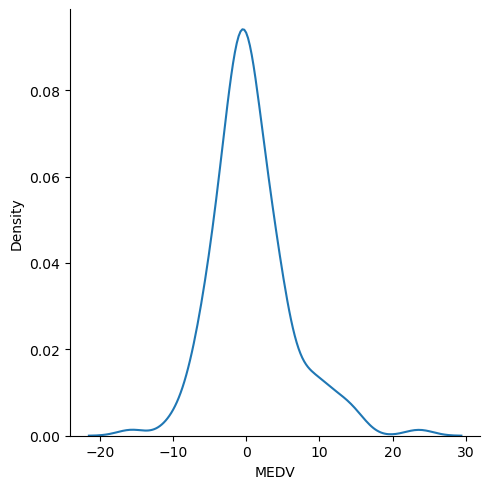

In [27]:
sns.displot(residuals,kind='kde')

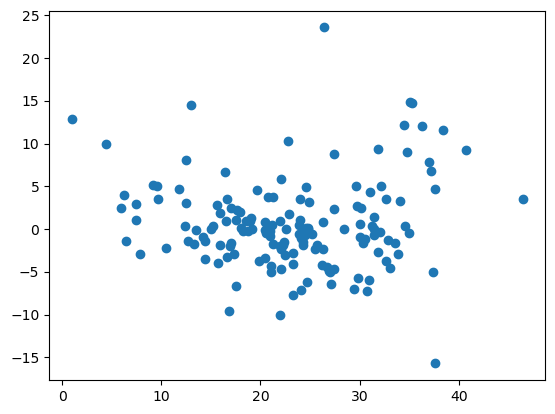

In [28]:
plt.scatter(predict,residuals)

In [29]:
 from sklearn.metrics import mean_absolute_error

In [30]:
from sklearn.metrics import mean_squared_error

In [31]:
print(mean_squared_error(y_test,predict))
print(mean_absolute_error(y_test,predict))

28.2523665539526
3.7095608841696204


In [32]:
from sklearn.metrics import r2_score
r2_score(y_test,predict)

0.7153705247731974

In [40]:
import pickle

In [43]:
pickle.dump(lr,open('lrmodel.pkl','wb'))

In [44]:
pickle_model=pickle.load(open('lrmodel.pkl','rb'))